In [ ]:
#| default_exp capture

# experimental

> Experimental `dialoghelper` capabilities.

In [ ]:
#| export
from dialoghelper.core import *
from fastcore.all import *
from fasthtml.common import Div,Script
from httpx import post as xpost
from importlib import resources
from lisette.core import *

import base64,json,time,uuid

In [ ]:
from IPython.display import display, Image
import PIL
from io import BytesIO

In [ ]:
#| export
def iife(code: str) -> str:
    "Wrap javascript code string in an IIFE and execute it via `add_html`"
    trigger_script = f'''
(async () => {{
{code}
}})();
'''
    add_html(Div(Script(trigger_script), hx_swap_oob=f'beforeend:#js-script'))

In [ ]:
iife((resources.files('dialoghelper')/'screenshot.js').read_text())

In [ ]:
#| export
def start_share():
    iife((resources.files('dialoghelper')/'screenshot.js').read_text())
    iife('await setupVideoStream();')

In [ ]:
start_share()

In [ ]:
#| export
def capture_screen(timeout:int=15):
    'Capture screenshot. Always re-call this when a fresh view may be needed.'
    idx = uuid.uuid4()
    iife(f"pushData('{idx}', {{img_data: await getScreenshot()}});")
    url = 'http://localhost:5001/pop_data_blocking_'
    d = dict2obj(xpost(url, data={'data_id': idx, 'timeout': timeout}).json())
    if 'img_data' in d: return ToolResponse([{'type': 'image_url', 'image_url': d.img_data}])
    else: return f'Capture failed: {d.error}'

In [ ]:
res = capture_screen()
list(res.content[0])

['type', 'image_url']

In [ ]:
res.content[0]['image_url'][:500]

''

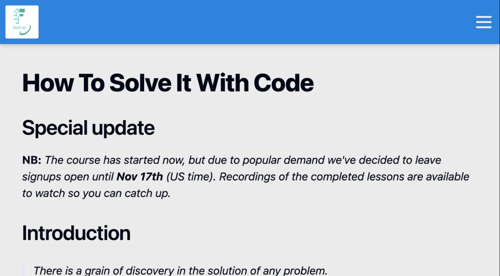

In [ ]:
data = base64.b64decode(res.content[0]['image_url'].split(',')[1])
img = PIL.Image.open(BytesIO(data))
img.thumbnail((500,500))
img

Please view my screen with &`capture_screen` and describe briefly what you see.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->



<details class='tool-usage-details'>

```json
{
  "id": "toolu_01LMDzFHtMfTruD34LrSt8yY",
  "call": {
    "function": "capture_screen",
    "arguments": {
      "timeout": "15"
    }
  },
  "result": "[{'type': 'image_url', 'image_url': '<TRUNCATED>"
}
```

</details>

I can see a webpage titled "How To Solve It With Code" with a fast.ai logo in the top left corner. There's a "Special update" section noting that the course has started but signups remain open until Nov 17th, with recordings available for catch-up. Below that is an "Introduction" section with the text "There is a grain of discovery in the solution of any problem."

## export -

In [ ]:
#|hide
from nbdev import nbdev_export
nbdev_export()